In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib
%matplotlib inline

In [27]:
data = pd.read_excel('weight-height.xlsx')

data.head(5)

,"Gender,""Height"",""Weight"""
0,"Male,73.847017017515,241.893563180437"
1,"Male,68.7819040458903,162.310472521300"
2,"Male,74.1101053917849,212.7408555565"
3,"Male,71.7309784033377,220.042470303077"
4,"Male,69.8817958611153,206.349800623871"


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender,"Height","Weight"  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


## Scaling dan Labeling Atribut


In [29]:
data.columns= ['data']

data.head(5)

,data
0,"Male,73.847017017515,241.893563180437"
1,"Male,68.7819040458903,162.310472521300"
2,"Male,74.1101053917849,212.7408555565"
3,"Male,71.7309784033377,220.042470303077"
4,"Male,69.8817958611153,206.349800623871"


In [30]:
data[['Gender', "Weight","Height"]] = data["data"].str.split(",", expand=True)
data = data.drop(columns = ['data'])
data.head()

,Gender,Weight,Height
0,Male,73.847017017515,241.893563180437
1,Male,68.7819040458903,162.310472521300
2,Male,74.1101053917849,212.7408555565
3,Male,71.7309784033377,220.042470303077
4,Male,69.8817958611153,206.349800623871


In [31]:
data.isna().sum()

Gender    0
Weight    0
Height    0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['Gender'] = labelencoder.fit_transform(data['Gender'])

data.head()

,Gender,Weight,Height
0,1,73.847017017515,241.893563180437
1,1,68.7819040458903,162.310472521300
2,1,74.1101053917849,212.7408555565
3,1,71.7309784033377,220.042470303077
4,1,69.8817958611153,206.349800623871


In [33]:
data = data.astype({'Height':'float','Weight':'float'})

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  int32  
 1   Weight  10000 non-null  float64
 2   Height  10000 non-null  float64
dtypes: float64(2), int32(1)
memory usage: 195.4 KB


## melihat persebaran data


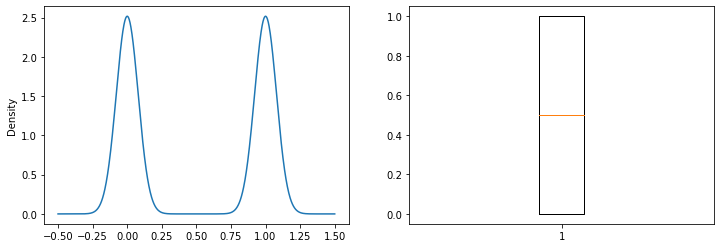

In [35]:
#Melihat distribusi dari Gender
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['Gender'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data['Gender'])
plt.show()

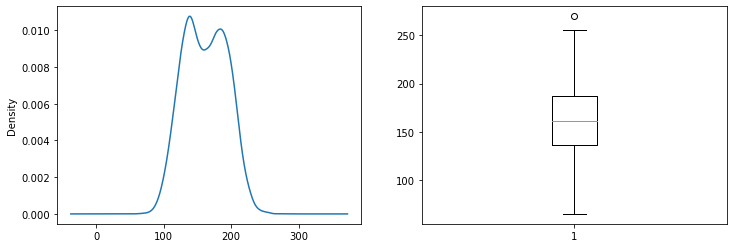

In [36]:
#Melihat distribusi dari Height
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['Height'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data['Height'])
plt.show()

#Persebaran mirip dengan distribusi normal 

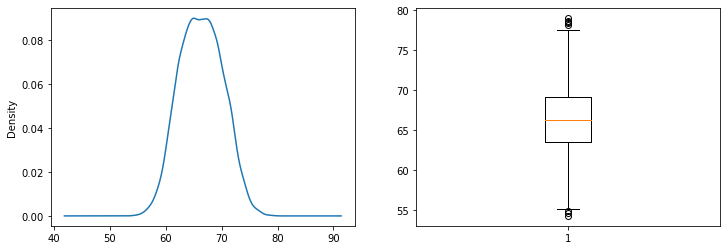

In [37]:
#Melihat distribusi dari Weight
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['Weight'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data['Weight'])
plt.show()

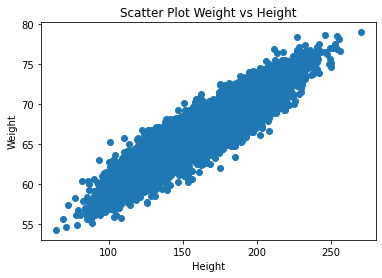

In [38]:
#Multivariate analysis Weight dan Height.
#Menggunakan scatter plot.
plt.scatter(data['Height'], data['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot Weight vs Height')
plt.show()

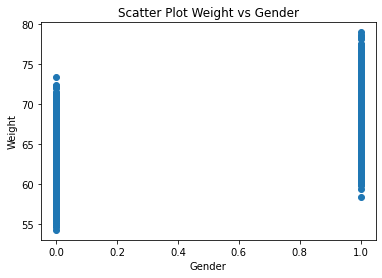

In [39]:
#Multivariate analysis Weight dan Gender.
#Menggunakan scatter plot.
plt.scatter(data['Gender'], data['Weight'])
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Scatter Plot Weight vs Gender')
plt.show()

Dari analisi tersebut dapat disimpulkan kalau gender laki-laki memiliki barat yang lebih tinggi dari pada wanita dan semakin tinggi maka beratnya semakin berat juga. 

In [40]:
x = data[['Height', 'Gender']]
y = data['Weight']

In [41]:
print(x.shape)
print(y.shape)

(10000, 2)
(10000,)


## Training Data

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [43]:
lin_reg = LinearRegression()
model = lin_reg.fit(x_train, y_train)
print(model)

LinearRegression()


In [44]:
# nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 0.12325442 -1.01956612]
46.98986120148554


In [45]:
#Akurasi
print('Akurasi model = ', (lin_reg.score(x_test, y_test)*100),'%')

Akurasi model =  86.02086866003887 %


## Menyimpan Model dan Scaler

In [46]:
joblib.dump((model), "prediksi berat badan dengan linear regression.pkl")

['prediksi berat badan dengan linear regression.pkl']

In [47]:
lin_reg.predict([[160,0]])

array([66.71056864])

In [48]:
model=joblib.load('prediksi berat badan dengan linear regression.pkl')

In [54]:


result = model.predict([[160,0]])
print(result)

[66.71056864]
